**Dataset Source**
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

## House Price Prediction using Linear Regression

### Objective
The objective of this task is to build a Linear Regression model that predicts house prices
based on structural and location-related features. The task includes data preprocessing,
exploratory data analysis, model training, evaluation, and interpretation of res `price`


In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('AmenaJasra_Week4Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
y = df['price']

X = df.drop('price', axis=1)

cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']
num_cols = X.columns.difference(cat_cols)

preprocess = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('num', 'passthrough', num_cols)
])

In [5]:
y_log = np.log1p(df['price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Apply preprocessing and model training
model = LinearRegression()

# Fit using transformed features
X_train_processed = preprocess.fit_transform(X_train)
model.fit(X_train_processed, y_train)

LinearRegression()

In [7]:
X_test_processed = preprocess.transform(X_test)
y_pred_log = model.predict(X_test_processed)

In [8]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2 = r2_score(y_test, y_pred_log)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 1324506.9600914232
R² Score: 0.6529242642153265


In [9]:
# Get feature names
feature_names = preprocess.get_feature_names_out()

# Pair coefficients with feature names
coeffs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

coeffs.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
9,num__bathrooms,1.094445e+06
4,cat__airconditioning_yes,7.914267e+05
3,cat__hotwaterheating_yes,6.846499e+05
5,cat__prefarea_yes,6.298906e+05
12,num__stories,4.074766e+05
2,cat__basement_yes,3.902512e+05
0,cat__mainroad_yes,3.679199e+05
1,cat__guestroom_yes,2.316100e+05
11,num__parking,2.248419e+05
10,num__bedrooms,7.677870e+04


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_num = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

vif_data = pd.DataFrame()
vif_data['Feature'] = X_num.columns
vif_data['VIF'] = [variance_inflation_factor(X_num.values, i)
                   for i in range(len(X_num.columns))]

vif_data

,Feature,VIF
0,area,6.737363
1,bedrooms,13.652525
2,bathrooms,9.155151
3,stories,6.683602
4,parking,1.901606


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

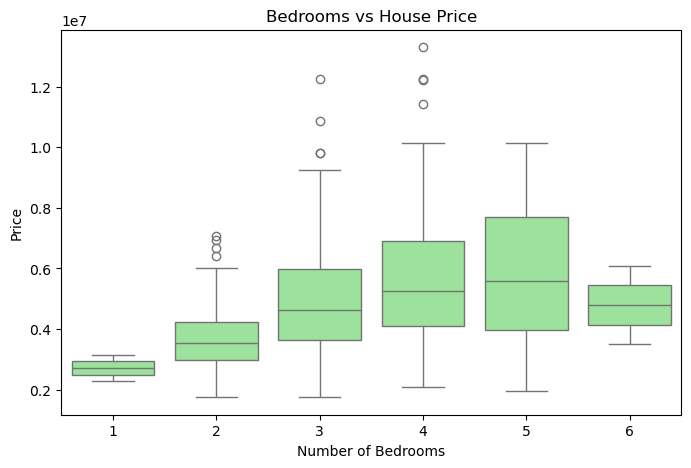

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['bedrooms'], y=df['price'],color='lightgreen')
plt.title("Bedrooms vs House Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()

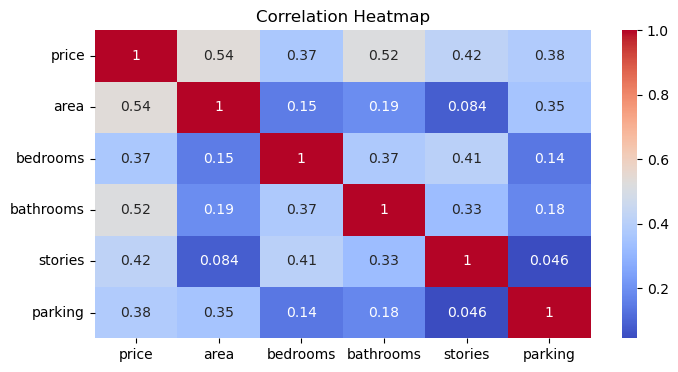

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

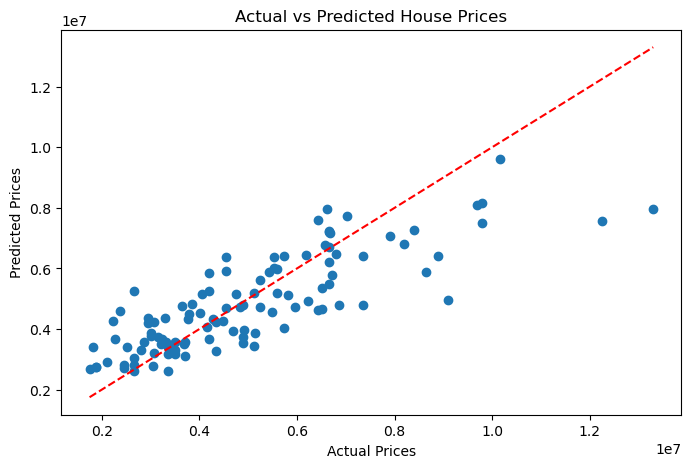

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_log)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.show()

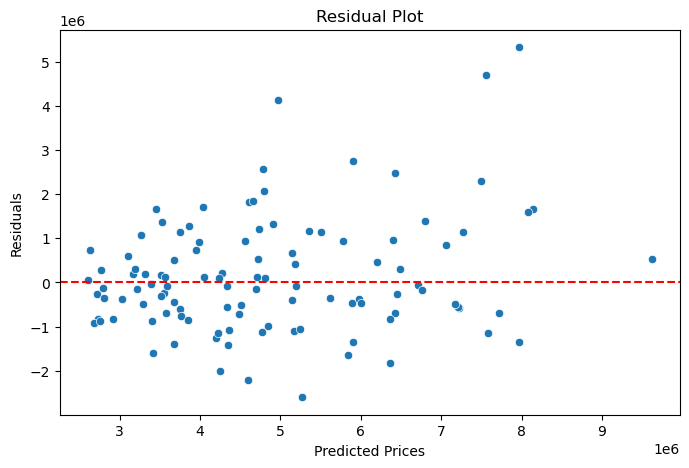

In [22]:
residuals = y_test - y_pred_log

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_log, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

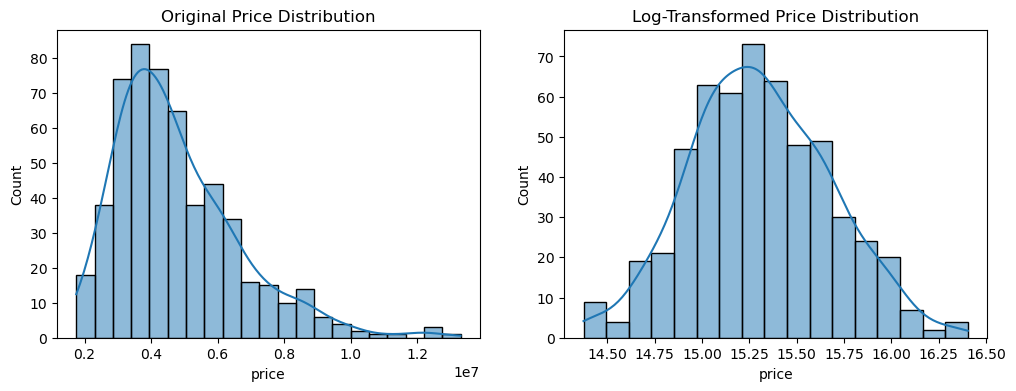

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True)
plt.title("Original Price Distribution")

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), kde=True)
plt.title("Log-Transformed Price Distribution")

plt.show()
